In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
banknote_authentication = fetch_ucirepo(id=267) 
  
# data (as pandas dataframes) 
X = banknote_authentication.data.features 
y = banknote_authentication.data.targets 
  
# metadata 
print(banknote_authentication.metadata) 
  
# variable information 
print(banknote_authentication.variables) 

{'uci_id': 267, 'name': 'Banknote Authentication', 'repository_url': 'https://archive.ics.uci.edu/dataset/267/banknote+authentication', 'data_url': 'https://archive.ics.uci.edu/static/public/267/data.csv', 'abstract': 'Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1372, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Fri Feb 16 2024', 'dataset_doi': '10.24432/C55P57', 'creators': ['Volker Lohweg'], 'intro_paper': None, 'additional_info': {'summary': 'Data were extracted from images that were taken from genuine and forged banknote-like specimens.  For digitization, an industrial camera usually used for print inspection was used. The final im

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from mpl_toolkits.mplot3d import Axes3D

In [22]:
# Verificar valores nulos en las características (features)
print("Valores nulos en X:")
print(X.isnull().sum())


Valores nulos en X:
variance    0
skewness    0
curtosis    0
entropy     0
dtype: int64


In [23]:
# Verificar valores nulos en la variable objetivo (target)
print("\nValores nulos en y:")
print(y.isnull().sum())


Valores nulos en y:
class    0
dtype: int64


In [24]:
# Renombrar columnas class
df = X.copy()
df['class'] = y['class']
df['class'] = df['class'].astype('category')

In [25]:
# Resumen del dataset
print(df.info())
print(df.describe())
print(df['class'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   variance  1372 non-null   float64 
 1   skewness  1372 non-null   float64 
 2   curtosis  1372 non-null   float64 
 3   entropy   1372 non-null   float64 
 4   class     1372 non-null   category
dtypes: category(1), float64(4)
memory usage: 44.5 KB
None
          variance     skewness     curtosis      entropy
count  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657
std       2.842763     5.869047     4.310030     2.101013
min      -7.042100   -13.773100    -5.286100    -8.548200
25%      -1.773000    -1.708200    -1.574975    -2.413450
50%       0.496180     2.319650     0.616630    -0.586650
75%       2.821475     6.814625     3.179250     0.394810
max       6.824800    12.951600    17.927400     2.449500
class
0    762
1    610
Name: cou

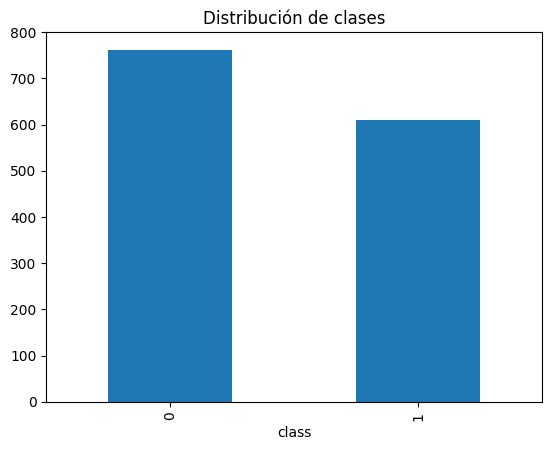

In [26]:
# Visualizaciones
df['class'].value_counts().plot(kind='bar', title='Distribución de clases')
plt.show()

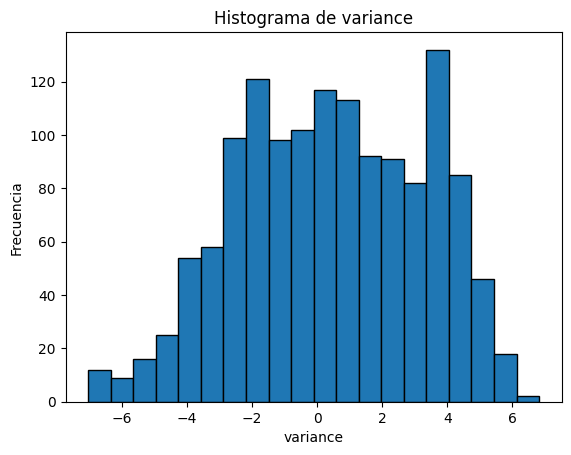

In [27]:
plt.hist(df['variance'], bins=20, edgecolor='black')
plt.title('Histograma de variance')
plt.xlabel('variance')
plt.ylabel('Frecuencia')
plt.show()

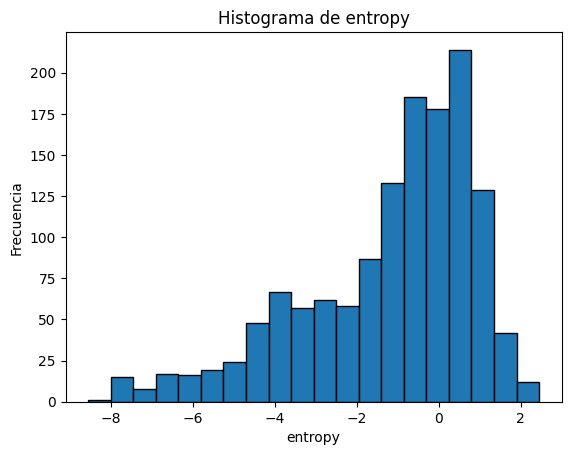

In [28]:
plt.hist(df['entropy'], bins=20, edgecolor='black')
plt.title('Histograma de entropy')
plt.xlabel('entropy')
plt.ylabel('Frecuencia')
plt.show()

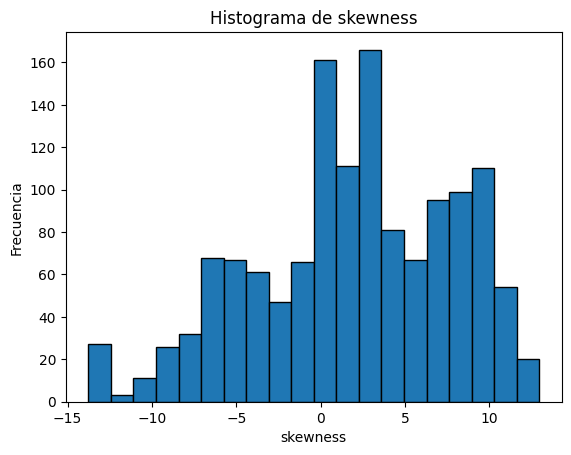

In [29]:
plt.hist(df['skewness'], bins=20, edgecolor='black')
plt.title('Histograma de skewness')
plt.xlabel('skewness')
plt.ylabel('Frecuencia')
plt.show()

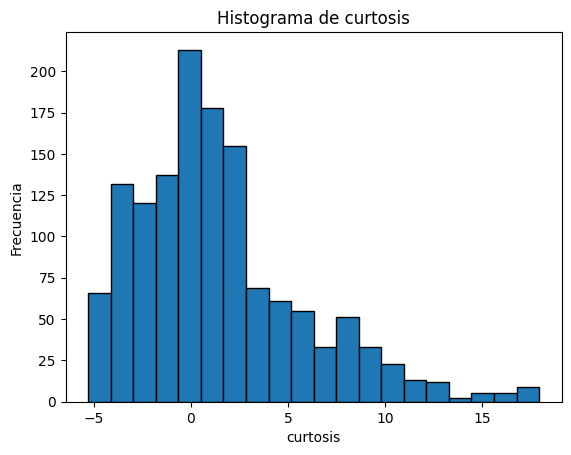

In [30]:
plt.hist(df['curtosis'], bins=20, edgecolor='black')
plt.title('Histograma de curtosis')
plt.xlabel('curtosis')
plt.ylabel('Frecuencia')
plt.show()

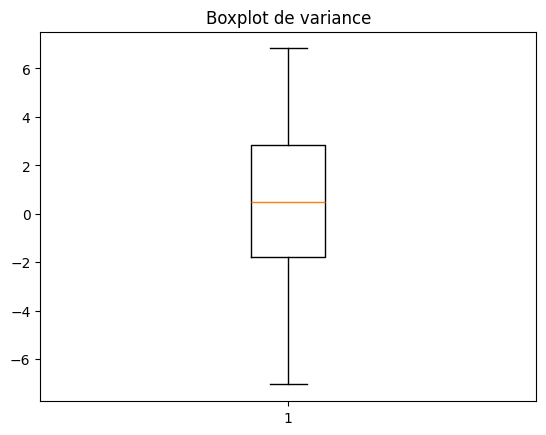

In [31]:
plt.boxplot(df['variance'])
plt.title(f'Boxplot de variance')
plt.show()

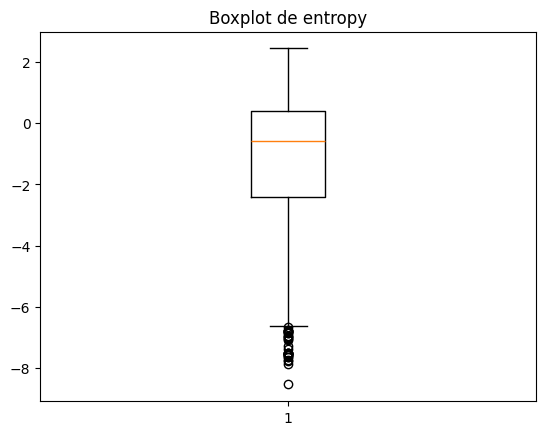

In [32]:
plt.boxplot(df['entropy'])
plt.title(f'Boxplot de entropy')
plt.show()

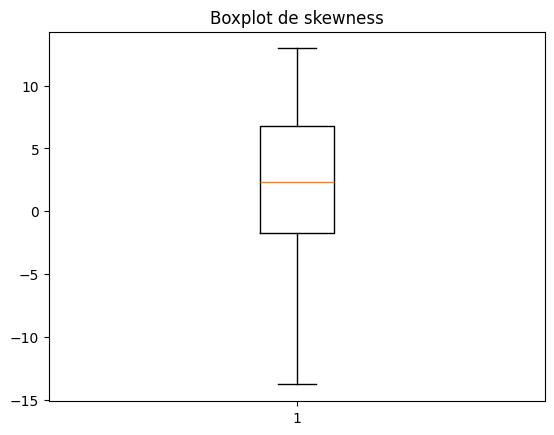

In [33]:
plt.boxplot(df['skewness'])
plt.title(f'Boxplot de skewness')
plt.show()

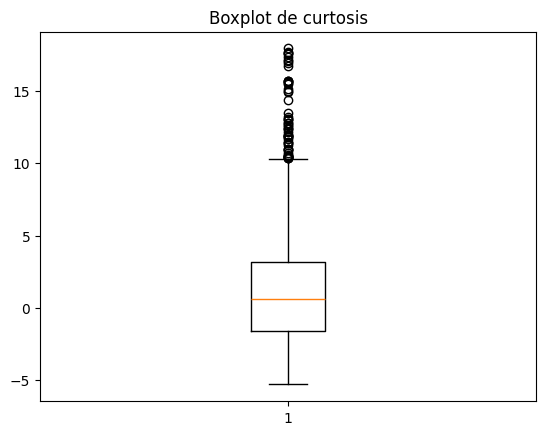

In [34]:
plt.boxplot(df['curtosis'])
plt.title(f'Boxplot de curtosis')
plt.show()

In [35]:
# Separar datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('class', axis=1), df['class'],
    test_size=0.3, random_state=123456, stratify=df['class']
)

In [36]:
# Entrenar modelo KMeans con 2 clusters (como hay dos clases)
modelo = KMeans(n_clusters=2, random_state=42)
modelo.fit(X_train)
y_train_pred = modelo.labels_
y_test_pred = modelo.predict(X_test)

In [37]:
# Predicciones y matrices de confusión
y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

In [38]:
print("Matriz de confusión (entrenamiento):")
print(confusion_matrix(y_train, y_pred_train))

Matriz de confusión (entrenamiento):
[[395 138]
 [233 194]]


In [39]:
print("Matriz de confusión (prueba):")
print(confusion_matrix(y_test, y_pred_test))

Matriz de confusión (prueba):
[[170  59]
 [105  78]]


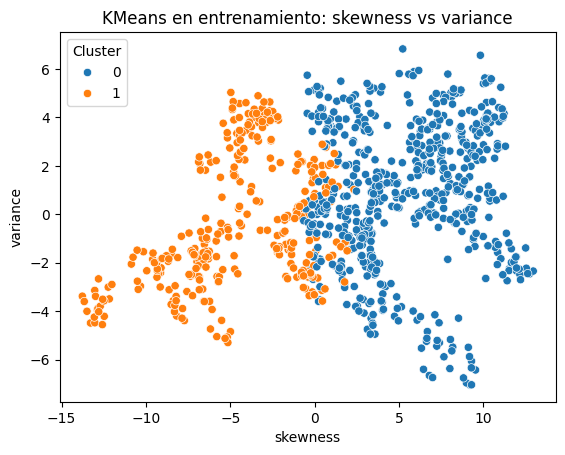

In [40]:
# Graficar clusters predichos (entrenamiento)
plot_data_train = X_train.copy()
plot_data_train['Cluster'] = y_train_pred
sns.scatterplot(data=plot_data_train, x='skewness', y='variance', hue='Cluster')
plt.title("KMeans en entrenamiento: skewness vs variance")
plt.show()

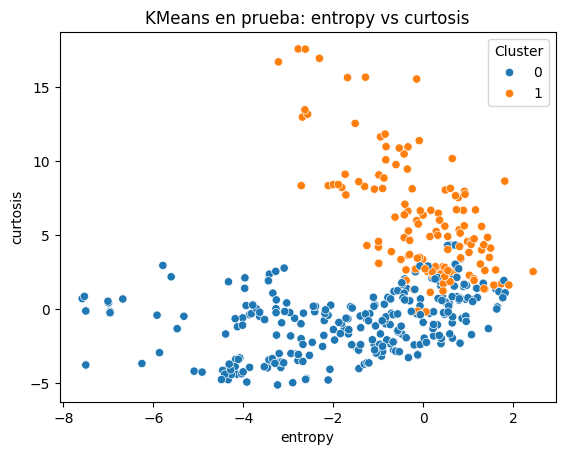

In [41]:
# Graficar clusters predichos (prueba)
plot_data_test = X_test.copy()
plot_data_test['Cluster'] = y_test_pred
sns.scatterplot(data=plot_data_test, x='entropy', y='curtosis', hue='Cluster')
plt.title("KMeans en prueba: entropy vs curtosis")
plt.show()

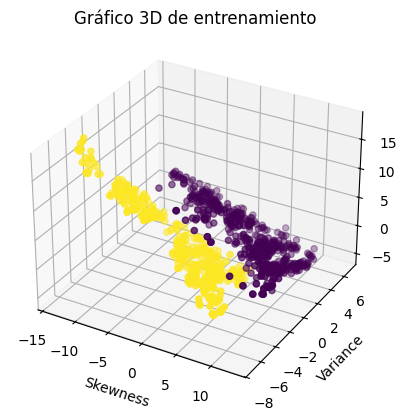

In [42]:
# Gráfico 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['skewness'], X_train['variance'], X_train['curtosis'], c=y_train.cat.codes, cmap='viridis')
ax.set_xlabel('Skewness')
ax.set_ylabel('Variance')
ax.set_zlabel('Curtosis')
plt.title("Gráfico 3D de entrenamiento")
plt.show()